# Step 2: Data Preprocessing

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
current_dir = os.getcwd()

In [3]:
for dirpath, dirname, filenames in os.walk(current_dir):
    for filename in filenames:
        print(filename)

creating_dataframe.ipynb
data_preprocessing.ipynb
decision_tree_and_random_forest_modelling.ipynb
creating_dataframe-checkpoint.ipynb
data_preprocessing-checkpoint.ipynb


In [4]:
df = pd.read_csv('../dataset/Q1_2019.csv')

In [5]:
df.shape

(9577046, 129)

In [6]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
9577041,2019-03-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,134.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9577042,2019-03-31,ZA10MCEQ,ST8000DM002,8001563222016,0,72.0,15233376.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9577043,2019-03-31,ZCH0CRTK,ST12000NM0007,12000138625024,0,81.0,122099464.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9577044,2019-03-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,134.0,101.0,148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9577045,2019-03-31,PL2331LAHDS4TJ,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the number of unique hard drives on 1st Jan 2019

In [8]:
selected_data = df[df['date'] == '2019-01-01']

In [9]:
drive_counts = selected_data['serial_number'].value_counts()

In [10]:
drive_counts

serial_number
Z305B2QN           1
WD-WXJ1A75F6SXU    1
ZCH077L7           1
ZCH07HQX           1
ZCH077L1           1
                  ..
PL1331LAHD3XAH     1
S301GMGS           1
S301GMGT           1
PL2331LAHDRZ3J     1
Z30271GD           1
Name: count, Length: 106918, dtype: int64

In [11]:
counts_array = drive_counts.values

### Check if any hard drive count is not equal to 1

In [12]:
if (drive_counts != 1).any():
    print("There are counts not equal to 1.")
else:
    print("All counts are equal to 1."
          "\nThis means that each hard drive has only been tested once per day")

All counts are equal to 1.
This means that each hard drive has only been tested once per day


In [13]:
df['failure'].value_counts()

failure
0    9576618
1        428
Name: count, dtype: int64

### Handling missing values

In [14]:
total_cells = np.prod(df.shape)
# The : in the f-string formats the number with commas as thousands separators
total_cells = f'{total_cells:,}'
print(f'The total number of cells are {total_cells}')

The total number of cells are 1,235,438,934


In [26]:
# Checks the number of missing (null) values in each column
missing_values_count = df.isna().sum()
missing_values_count[0:10]

date                        0
serial_number               0
model                       0
capacity_bytes              0
failure                     0
smart_1_normalized       1534
smart_1_raw              1534
smart_2_normalized    7457196
smart_2_raw           7457196
smart_3_normalized       3363
dtype: int64

In [37]:
def check_missing(df):
    """
    Checks how much missing data there is from a DataFrame.
    """
    total_missing = f'{df.isna().sum().sum():,}'
    print(f'The total number of missing cells are {total_missing}')
    
    total_cells = np.prod(df.shape)
    total_missing = df.isna().sum().sum()
    percent_missing = total_missing / total_cells * 100
    rounded_percent_missing = round(percent_missing, 2)
    print(f'{rounded_percent_missing}% of the data is missing')

In [16]:
check_missing(df)

The total number of missing cells are 765,053,890
61.925674264042584% of the data is missing


### Remove columns that have all null values

In [17]:
columns_before = df.columns
print(f'Initial number of columns of dataframe: {df.shape[1]}\n')

df = df.dropna(axis=1, how='all')

columns_after = df.columns
print(f'Number of columns of dataframe after removing columns consisting of entirely null values: {df.shape[1]}\n')

removed_columns = set(columns_before) - set(columns_after)
print(f'Columns removed: {removed_columns}')

Initial number of columns of dataframe: 129

Number of columns of dataframe after removing columns consisting of entirely null values: 115

Columns removed: {'smart_201_normalized', 'smart_179_raw', 'smart_201_raw', 'smart_179_normalized', 'smart_13_raw', 'smart_182_normalized', 'smart_15_normalized', 'smart_181_normalized', 'smart_182_raw', 'smart_13_normalized', 'smart_15_raw', 'smart_181_raw', 'smart_255_normalized', 'smart_255_raw'}


In [27]:
check_missing(df)

The total number of missing cells are 630,975,246
57.290538957056455% of the data is missing


In [22]:
df.shape

(9577046, 115)

### Only keep columns where the proportion of missing values is less than or equal to 5% of the column data

In [28]:
df.isna().sum()

date                          0
serial_number                 0
model                         0
capacity_bytes                0
failure                       0
                         ...   
smart_251_raw           9576961
smart_252_normalized    9576961
smart_252_raw           9576961
smart_254_normalized    9561418
smart_254_raw           9561418
Length: 115, dtype: int64

In [29]:
df.isna().sum().values

array([      0,       0,       0,       0,       0,    1534,    1534,
       7457196, 7457196,    3363,    3363,    3363,    3363,    3363,
          3363,    3363,    3363, 7457196, 7457196,    1534,    1534,
          3363,    3363, 9467408, 9467408,    1534,    1534, 9575217,
       9575217, 9575217, 9575217, 9208793, 9208793, 9467668, 9467668,
       9467668, 9467668, 9575217, 9575217, 9575217, 9575217, 9575217,
       9575217, 9575217, 9575217, 9575217, 9575217, 7446707, 7446707,
       5136912, 5136912, 2182118, 2182118, 2182118, 2182118, 5136912,
       5136912, 2182118, 2182118, 4866014, 4866014,    1590,    1590,
         54152,   54152,    1534,    1534, 4140124, 4140124, 7398291,
       7398291,    3363,    3363,    3363,    3363,    3363,    3363,
       6404059, 6404059, 9575217, 9575217, 9368731, 9368731, 9368731,
       9368731, 9303958, 9303958, 9368731, 9368731, 9526313, 9526313,
       9368731, 9368731, 9575217, 9575217, 9575217, 9575217, 9575217,
       9575217, 9575

In [30]:
len(df)

9577046

In [31]:
# Gets the columns where the proportion of missing values is less than or equal to 5%
df = df[df.columns[(df.isna().sum().values/len(df) <= 0.05)]]

In [32]:
df.shape

(9577046, 33)

In [36]:
check_missing(df)

The total number of missing cells are 177,564
0.06% of the data is missing


In [38]:
df.shape

(9577046, 33)

In [39]:
df.isna().sum()

date                        0
serial_number               0
model                       0
capacity_bytes              0
failure                     0
smart_1_normalized       1534
smart_1_raw              1534
smart_3_normalized       3363
smart_3_raw              3363
smart_4_normalized       3363
smart_4_raw              3363
smart_5_normalized       3363
smart_5_raw              3363
smart_7_normalized       3363
smart_7_raw              3363
smart_9_normalized       1534
smart_9_raw              1534
smart_10_normalized      3363
smart_10_raw             3363
smart_12_normalized      1534
smart_12_raw             1534
smart_192_normalized     1590
smart_192_raw            1590
smart_193_normalized    54152
smart_193_raw           54152
smart_194_normalized     1534
smart_194_raw            1534
smart_197_normalized     3363
smart_197_raw            3363
smart_198_normalized     3363
smart_198_raw            3363
smart_199_normalized     3363
smart_199_raw            3363
dtype: int

### Remove rows that still have any missing values from the remaining columns

In [40]:
# Remove rows that still have any missing values in those selected columns
df = df.dropna()

In [41]:
df.shape

(9522894, 33)

In [44]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,91.0,0.0,100.0,...,83.0,34169.0,20.0,20.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,98.0,0.0,100.0,...,99.0,2145.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,99.0,0.0,100.0,...,100.0,363.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,93.0,0.0,100.0,...,100.0,687.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,...,100.0,183.0,193.0,31.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577041,2019-03-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,0.0,100.0,...,100.0,3.0,250.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
9577042,2019-03-31,ZA10MCEQ,ST8000DM002,8001563222016,0,72.0,15233376.0,94.0,0.0,100.0,...,100.0,152.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
9577043,2019-03-31,ZCH0CRTK,ST12000NM0007,12000138625024,0,81.0,122099464.0,97.0,0.0,100.0,...,100.0,677.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
9577044,2019-03-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,148.0,490.0,100.0,...,100.0,303.0,181.0,33.0,100.0,0.0,100.0,0.0,200.0,0.0


### After dropping some rows there are 9,522,894 rows in the dataframe but the last row is at index 9,577,045. So that means the index may still contain the original values.

In [45]:
# Reset the index and drop the old index
df = df.reset_index(drop=True)

In [48]:
df.shape

(9522894, 33)

In [46]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,91.0,0.0,100.0,...,83.0,34169.0,20.0,20.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,98.0,0.0,100.0,...,99.0,2145.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,99.0,0.0,100.0,...,100.0,363.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,93.0,0.0,100.0,...,100.0,687.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,...,100.0,183.0,193.0,31.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522889,2019-03-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,0.0,100.0,...,100.0,3.0,250.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
9522890,2019-03-31,ZA10MCEQ,ST8000DM002,8001563222016,0,72.0,15233376.0,94.0,0.0,100.0,...,100.0,152.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
9522891,2019-03-31,ZCH0CRTK,ST12000NM0007,12000138625024,0,81.0,122099464.0,97.0,0.0,100.0,...,100.0,677.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
9522892,2019-03-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,148.0,490.0,100.0,...,100.0,303.0,181.0,33.0,100.0,0.0,100.0,0.0,200.0,0.0


In [47]:
check_missing(df)

The total number of missing cells are 0
0.0% of the data is missing


In [116]:
df.isna().sum()

capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
date_diff               0
dtype: int64

In [28]:
df.to_csv('../dataset/preprocessed_q1_2019.csv', index=False)

In [79]:
df = pd.read_csv('../dataset/preprocessed_q1_2019.csv')

In [80]:
umm = df[df['model'] == 'ST8000DM004']
umm.shape

(273, 33)

In [81]:
umm[umm['failure'] == 1]

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
226302,2019-01-03,WCT0EJDY,ST8000DM004,8001563222016,1,55.0,86687530.0,99.0,0.0,100.0,...,100.0,1426.0,37.0,37.0,100.0,0.0,100.0,0.0,200.0,0.0


In [82]:
# Getting the serial number of the hard drives that have failed at least once
failed_hdds = df.loc[df.failure==1]['serial_number']

In [83]:
len(failed_hdds)

418

In [88]:
# Filters the dataframe to include only rows where the serial number is in the failed hdds
df = df.loc[df['serial_number'].isin(failed_hdds)].reset_index(drop=True)

In [89]:
df.shape

(18588, 33)

In [91]:
df.to_csv('../dataset/failed_hdds.csv', index=False)

In [ ]:
df = pd.read_csv('../dataset/failed_hdds.csv')

In [92]:
df[df['model'] == 'ST8000DM004']

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
54,2019-01-01,WCT0EJDY,ST8000DM004,8001563222016,0,54.0,191168752.0,99.0,0.0,100.0,...,100.0,1306.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
458,2019-01-02,WCT0EJDY,ST8000DM004,8001563222016,0,54.0,191288728.0,99.0,0.0,100.0,...,100.0,1307.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
856,2019-01-03,WCT0EJDY,ST8000DM004,8001563222016,1,55.0,86687530.0,99.0,0.0,100.0,...,100.0,1426.0,37.0,37.0,100.0,0.0,100.0,0.0,200.0,0.0


In [93]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0


In [94]:
df[df['serial_number'] == 'Z304JN7J']

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
403,2019-01-02,Z304JN7J,ST4000DM000,4000787030016,0,118.0,186070184.0,92.0,0.0,100.0,...,97.0,7273.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
802,2019-01-03,Z304JN7J,ST4000DM000,4000787030016,0,118.0,178727040.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1196,2019-01-04,Z304JN7J,ST4000DM000,4000787030016,0,112.0,48739088.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
1585,2019-01-05,Z304JN7J,ST4000DM000,4000787030016,0,114.0,59957400.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
1973,2019-01-06,Z304JN7J,ST4000DM000,4000787030016,0,116.0,114838640.0,92.0,0.0,100.0,...,97.0,7273.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
2358,2019-01-07,Z304JN7J,ST4000DM000,4000787030016,0,120.0,2121928.0,92.0,0.0,100.0,...,97.0,7273.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
2741,2019-01-08,Z304JN7J,ST4000DM000,4000787030016,0,118.0,168567288.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
3117,2019-01-09,Z304JN7J,ST4000DM000,4000787030016,0,116.0,106967816.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
3486,2019-01-10,Z304JN7J,ST4000DM000,4000787030016,0,119.0,231100456.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0


In [96]:
# Calculates the maximum value (latest date) for each group (serial number)
df.loc[:, 'end_date'] = df.groupby('serial_number')['date'].transform('max')

In [97]:
df['end_date'].dtype

dtype('O')

In [98]:
df['date'] = pd.to_datetime(df['date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [99]:
df['date'].dtype

dtype('<M8[ns]')

In [100]:
df['end_date'].dtype

dtype('<M8[ns]')

In [101]:
df.loc[:, 'date_diff'] = df['end_date'] - df['date']
df.loc[:, 'date_diff'].describe()

count                         18588
mean     29 days 11:31:57.366042608
std      21 days 08:23:28.118660467
min                 0 days 00:00:00
25%                11 days 00:00:00
50%                26 days 00:00:00
75%                45 days 00:00:00
max                88 days 00:00:00
Name: date_diff, dtype: object

In [114]:
df['date_diff'].dtype

dtype('<m8[ns]')

In [103]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,end_date,date_diff
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-27,26 days
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,2019-01-27,26 days
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-02-22,52 days
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-25,83 days
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-28,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-29,0 days
18584,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days
18585,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,2019-03-29,0 days
18586,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days


In [105]:
# axis=1 to drop columns
df = df.drop(['date', 'serial_number', 'model', 'end_date'], axis=1)
df

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,date_diff
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,26 days
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,26 days
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,52 days
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,83 days
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,1.0,100.0,16.0,...,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,0 days
18584,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,7.0,100.0,0.0,...,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days
18585,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,16.0,100.0,0.0,...,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,0 days
18586,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,3.0,100.0,418.0,...,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days


In [106]:
min_value = df['date_diff'].min()
max_value = df['date_diff'].max()
print(f'Target values will range from {min_value} to {max_value}')

Target values will range from 0 days 00:00:00 to 88 days 00:00:00


In [107]:
RUL = df['date_diff'].dt.days.values

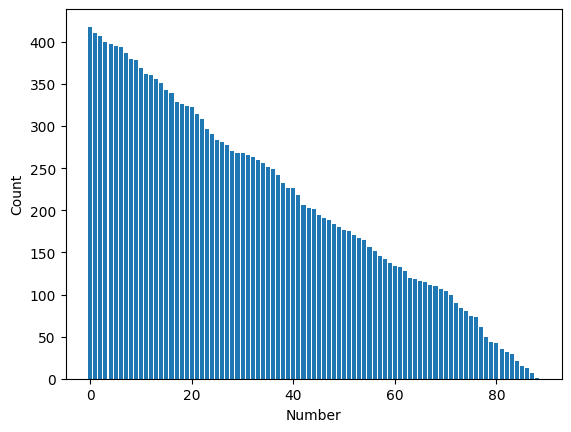

In [108]:
from collections import Counter

counter = Counter(RUL)
plt.bar(counter.keys(), counter.values())
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

In [115]:
df.to_csv('../dataset/RUL_added.csv', index=False)

## Step 1: Creating a dataframe that has the number of drive days for each model. Drive days refers to the number of days a hard drive has been running (the number of rows in the main dataframe for that model).
### Written in SQL like this:

``` SQL
CREATE TABLE drive_days AS
    SELECT model, count(*) AS drive_days 
    FROM drive_stats 
    GROUP BY model;  
```

In [110]:
# Groups the dataframe by the 'model' column and calculates the size (number of rows) for each group
# The .size() gets the count of occurrences for each model
drive_days = df.groupby('model').size().reset_index(name='drive_days')

# Sort the dataframe by 'drive_days' in descending order
drive_days = drive_days.sort_values(by='drive_days', ascending=False).reset_index(drop=True)

drive_days.head()

KeyError: 'model'

In [111]:
df[df['model'] == 'ST8000DM004']

KeyError: 'model'

In [112]:
drive_days[drive_days['model'] == 'ST8000DM004']

,model,drive_days
30,ST8000DM004,273


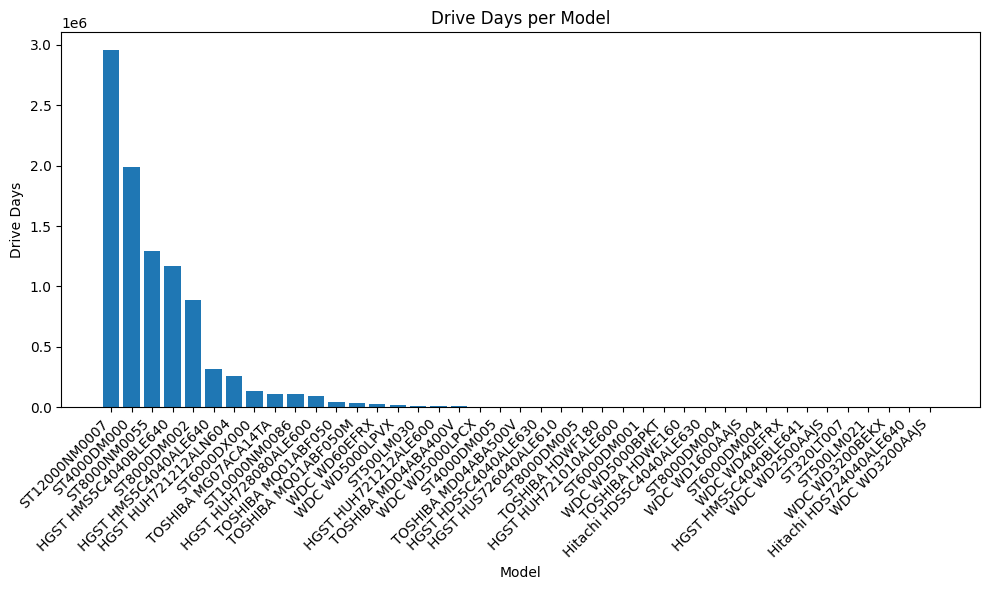

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(drive_days['model'], drive_days['drive_days'])
plt.xlabel('Model')
plt.ylabel('Drive Days')
plt.title('Drive Days per Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
# Total drive days across all models (which is also the total rows)
total_drive_days = len(df)
print(f'Total drive days across all models: {total_drive_days}')

Total drive days across all models: 9522894


## Step 2: Creating a dataframe that has the number of failures for each model.
### Written in SQL like this:

``` SQL
CREATE TABLE failures AS
    SELECT model, count(*) AS failures
    FROM drive_stats
    WHERE failure = 1
    GROUP BY model;
```

In [60]:
failures = df[df['failure'] == 1].groupby('model').size().reset_index(name='failures')
failures = failures.sort_values(by='failures', ascending=False).reset_index(drop=True)
failures.head()

,model,failures
0,ST12000NM0007,174
1,ST4000DM000,105
2,ST8000NM0055,57
3,ST8000DM002,27
4,TOSHIBA MQ01ABF050,13


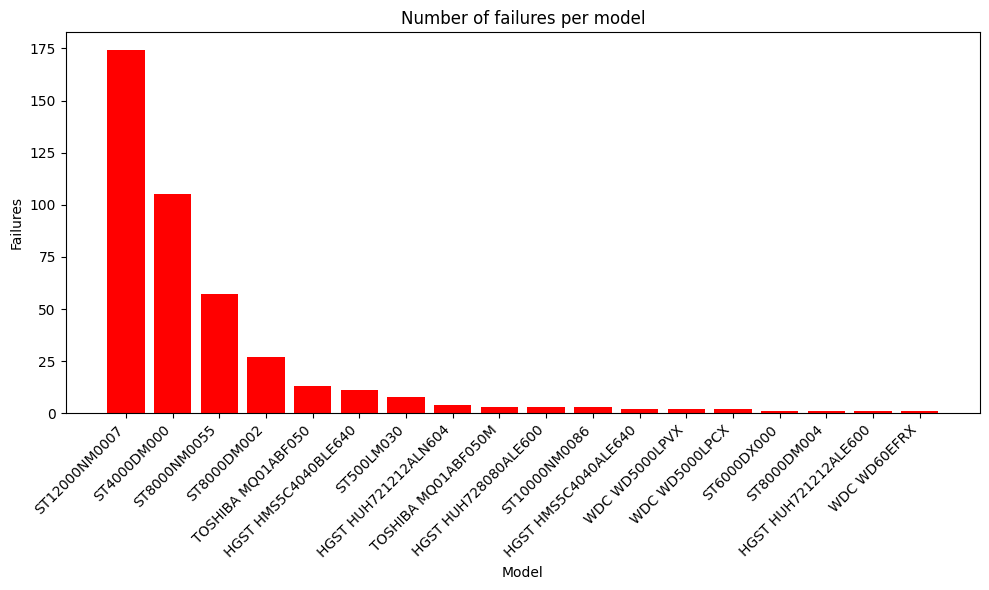

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(failures['model'], failures['failures'], color='red')
plt.xlabel('Model')
plt.ylabel('Failures')
plt.title('Number of failures per model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### More data analysis

In [62]:
# Calculating the total failures
total_failures = (df['failure'] == 1).sum()
print(f'Total failures: {total_failures}')

# Calculating the total unique days
total_unique_days = df['date'].nunique()
print(f'Total unique days: {total_unique_days}')

print(f'Total drive days: {total_drive_days}')

print(f'So we have {total_failures} failures in {total_drive_days} drive days of operation.')

Total failures: 418
Total unique days: 90
Total drive days: 9522894
So we have 418 failures in 9522894 drive days of operation.


The daily failure rate is the drive failures / drive days. The annual failure rate would be the daily failure rate * 365 (assuming the rest of the year would have similar results to the first 3 months)

In [64]:
daily_failure_rate = (total_failures / total_drive_days) * 100
# daily_failure_rate = round(daily_failure_rate, 2)

annual_failure_rate = daily_failure_rate * 365
# annual_failure_rate = round(annual_failure_rate, 2)

print(f'Daily failure rate is {daily_failure_rate}%')
print(f'Annual failure rate is {annual_failure_rate}%')

Daily failure rate is 0.004389421955132547%
Annual failure rate is 1.6021390136233797%


### Step 3: Creating a table that has the number of drives for each model as of the last day in the dataset
### In my case, that is 31st March 2019
### Written in SQL like this:

``` SQL
CREATE TABLE model_count AS
    SELECT model, count(*) AS count
    FROM drive_stats
    WHERE date = '2019-03-31'
    GROUP BY model;
```

In [117]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter rows for specific date and calculate the number of drives for each model
model_count = df[df['date'] == '2019-03-31'].groupby('model').size().reset_index(name='count')

# Sort the dataframe by 'count' in descending order
model_count = model_count.sort_values(by='count', ascending=False).reset_index(drop=True)
model_count.head()

,model,count
0,ST12000NM0007,34708
1,ST4000DM000,19785
2,ST8000NM0055,14381
3,HGST HMS5C4040BLE640,12753
4,ST8000DM002,9874


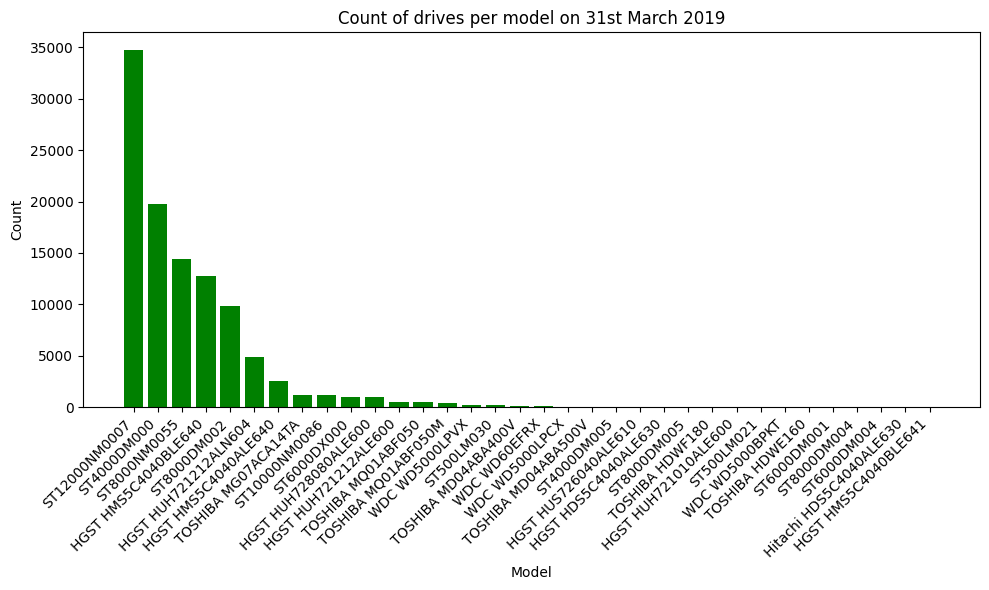

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(model_count['model'], model_count['count'], color='green')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Count of drives per model on 31st March 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Join the tables together and compute the annual failure rate
### drive_years = drive_days / 365
### Annual failure rate = (number of failures / number of drive years) * 100
### Written in SQL like this:

``` SQL
CREATE TABLE failure_rates AS
    SELECT drive_days.model AS model,
           drive_days.drive_days AS drive_days,
           failures.failures AS failures, 
           100.0 * (1.0 * failures) / (drive_days / 365.0) AS annual_failure_rate
    FROM drive_days, failures, model_count
    WHERE drive_days.model = failures.model
      AND model_count.model = failures.model
    ORDER BY model;
```

In [106]:
# Merge dataframes
# The on='model' argument in the pd.merge function indicates that the merge should be performed 
# based on the model column, and only rows with matching model values in both DataFrames will 
# be included in the result.
merged_df = pd.merge(drive_days, failures, on='model')
merged_df = pd.merge(merged_df, model_count, on='model')
merged_df.head()

,model,drive_days,failures,count
0,ST12000NM0007,2954794,174,34708
1,ST4000DM000,1989331,105,19785
2,ST8000NM0055,1294339,57,14381
3,HGST HMS5C4040BLE640,1172724,11,12753
4,ST8000DM002,888712,27,9874


In [107]:
# Calculate annual failure rate
failure_rates = merged_df.copy()
failure_rates['drive_years'] = failure_rates['drive_days'] / 365
failure_rates['annual_failure_rate (%)'] = (failure_rates['failures'] / failure_rates['drive_years']) * 100

failure_rates.head()

,model,drive_days,failures,count,drive_years,annual_failure_rate (%)
0,ST12000NM0007,2954794,174,34708,8095.326027,2.149388
1,ST4000DM000,1989331,105,19785,5450.221918,1.926527
2,ST8000NM0055,1294339,57,14381,3546.134247,1.607384
3,HGST HMS5C4040BLE640,1172724,11,12753,3212.942466,0.342365
4,ST8000DM002,888712,27,9874,2434.827397,1.108908


In [108]:
# Removing the count column
if 'count' in failure_rates.columns:
    failure_rates.drop('count', axis=1, inplace=True)
    print('Count column dropped')
else:
    print('Count column does not exist')

Count column dropped


### Moving the drive_years column next to the drive_days column

In [109]:
column_to_move = 'drive_years'
new_order = [col for col in failure_rates.columns if col != column_to_move]

In [110]:
new_order

['model', 'drive_days', 'failures', 'annual_failure_rate (%)']

In [111]:
new_order.insert(2, column_to_move)  # Insert 'drive_years' at index 2

In [112]:
new_order

['model', 'drive_days', 'drive_years', 'failures', 'annual_failure_rate (%)']

In [113]:
failure_rates = failure_rates[new_order]

In [114]:
failure_rates.head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST12000NM0007,2954794,8095.326027,174,2.149388
1,ST4000DM000,1989331,5450.221918,105,1.926527
2,ST8000NM0055,1294339,3546.134247,57,1.607384
3,HGST HMS5C4040BLE640,1172724,3212.942466,11,0.342365
4,ST8000DM002,888712,2434.827397,27,1.108908


In [209]:
failure_rates.sort_values(by='model').reset_index(drop=True).head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,HGST HMS5C4040ALE640,313365,858.534247,2,0.232955
1,HGST HMS5C4040BLE640,1172724,3212.942466,11,0.342365
2,HGST HUH721212ALE600,14040,38.465753,1,2.599715
3,HGST HUH721212ALN604,259370,710.602740,4,0.562902
4,HGST HUH728080ALE600,93598,256.432877,3,1.169897


In [218]:
sorted_AFR = failure_rates.sort_values(by='annual_failure_rate (%)', ascending=False).reset_index(drop=True)
sorted_AFR.head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST8000DM004,273,0.747945,1,133.699634
1,ST500LM030,14479,39.668493,8,20.167139
2,WDC WD5000LPCX,4920,13.479452,2,14.837398
3,TOSHIBA MQ01ABF050,46969,128.682192,13,10.102408
4,TOSHIBA MQ01ABF050M,32624,89.380822,3,3.356425


### Analysing the Annual Failure Rate per model

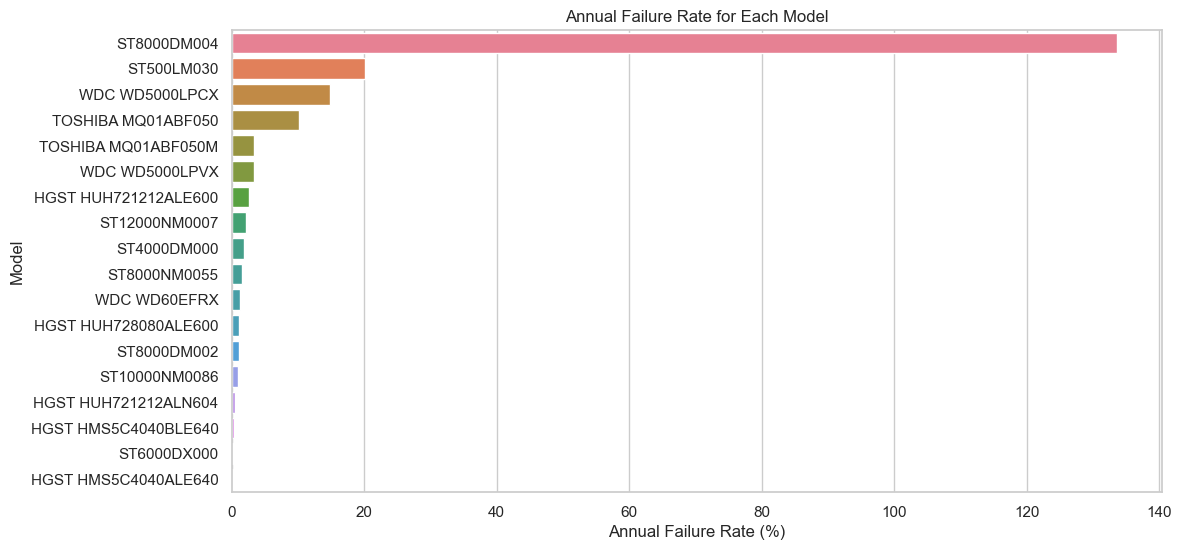

In [190]:
plt.figure(figsize=(12, 6))
sns.barplot(x='annual_failure_rate (%)', y='model', hue='model', data=sorted_AFR)
plt.title('Annual Failure Rate for Each Model')
plt.xlabel('Annual Failure Rate (%)')
plt.ylabel('Model')
plt.show()

### Removing the outlier model that has an annual failure rate of 134% (though its not too accurate because it has only had 1 failure and lasted 273 days

In [223]:
AFR_without_outlier = sorted_AFR.copy()  

if 'ST8000DM004' in AFR_without_outlier['model'].values:
    AFR_without_outlier.drop(AFR_without_outlier[AFR_without_outlier['model'] == 'ST8000DM004'].index, inplace=True)
    print('Row with model ST8000DM004 dropped')
else:
    print('Row with model ST8000DM004 does not exist')

Row with model ST8000DM004 dropped


In [224]:
AFR_without_outlier.reset_index(drop=True).head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST500LM030,14479,39.668493,8,20.167139
1,WDC WD5000LPCX,4920,13.479452,2,14.837398
2,TOSHIBA MQ01ABF050,46969,128.682192,13,10.102408
3,TOSHIBA MQ01ABF050M,32624,89.380822,3,3.356425
4,WDC WD5000LPVX,22015,60.315068,2,3.315921


### Analysing the annual failure rate per model without model ST8000DM004 (outlier)

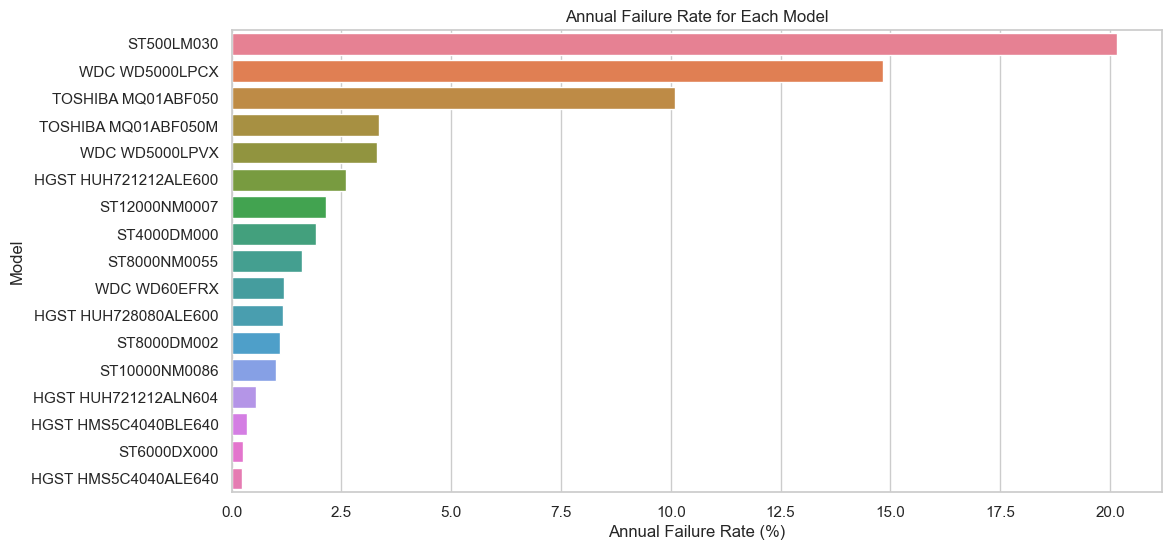

In [225]:
plt.figure(figsize=(12, 6))
sns.barplot(x='annual_failure_rate (%)', y='model', hue='model', data=AFR_without_outlier)
plt.title('Annual Failure Rate for Each Model')
plt.xlabel('Annual Failure Rate (%)')
plt.ylabel('Model')
plt.show()

### Drive years per model

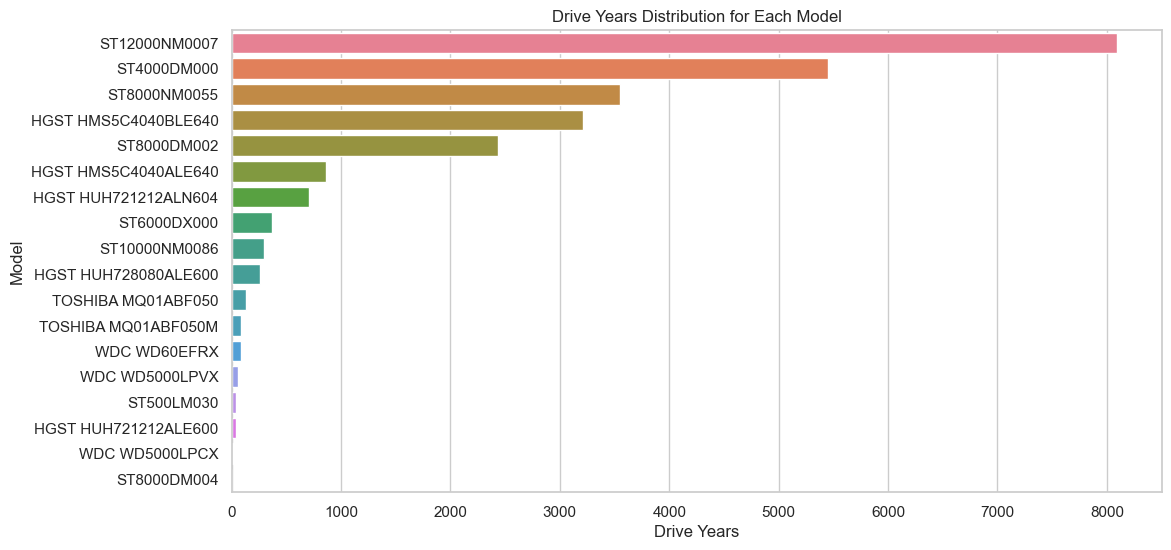

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(x='drive_years', y='model', hue='model', data=failure_rates)
plt.title('Drive Years Distribution for Each Model')
plt.xlabel('Drive Years')
plt.ylabel('Model')
plt.show()

### Failures per model

In [228]:
sorted_failures = failure_rates.sort_values(by='failures', ascending=False).reset_index(drop=True)
sorted_failures.head()

,model,drive_days,drive_years,failures,annual_failure_rate (%)
0,ST12000NM0007,2954794,8095.326027,174,2.149388
1,ST4000DM000,1989331,5450.221918,105,1.926527
2,ST8000NM0055,1294339,3546.134247,57,1.607384
3,ST8000DM002,888712,2434.827397,27,1.108908
4,TOSHIBA MQ01ABF050,46969,128.682192,13,10.102408


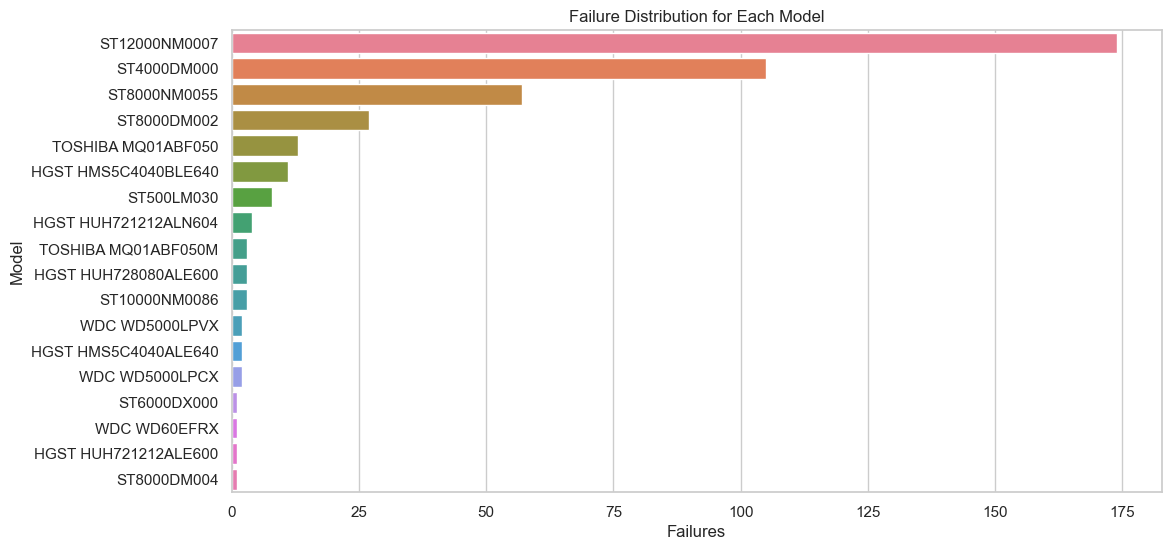

In [229]:
plt.figure(figsize=(12, 6))
sns.barplot(x='failures', y='model', hue='model', data=sorted_failures)
plt.title('Failure Distribution for Each Model')
plt.xlabel('Failures')
plt.ylabel('Model')
plt.show()

### Scatter plot of each model's drive year to failures

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=failure_rates['drive_years'], y=failure_rates['failures'], hue='model', data=failure_rates, s=100)
plt.title('Drive Years vs. Failures')
plt.xlabel('Drive Years')
plt.ylabel('Failures')
plt.legend(title='Model', bbox_to_anchor=(1.01, 0.98), loc='upper left')
plt.show()

NameError: name 'failure_rates' is not defined

<Figure size 1000x600 with 0 Axes>

### Testing out rule 2 on table 6 from https://www.kdd.org/kdd2016/papers/files/adf0849-botezatuA.pdf
### What it says is that if the hard drive is a Seagate model and the smart_197_raw sensor has a value >= 2, then the drive should be replaced with 100% confidence rate.
### The models that start with 'ST' are Seagate models

In [268]:
filtered_df = df[(df['model'].str.startswith('ST') & (df['smart_197_raw'] >= 2))].reset_index(drop=True)

In [269]:
filtered_df = filtered_df[['date', 'serial_number', 'model', 'failure', 'smart_197_raw']]

In [270]:
filtered_df.head()

,date,serial_number,model,failure,smart_197_raw
0,2019-01-01,ZCH05KWT,ST12000NM0007,0,88.0
1,2019-01-01,ZA11TXM3,ST8000DM002,0,24.0
2,2019-01-01,ZA17ZNMY,ST8000NM0055,0,16.0
3,2019-01-01,S300YQTN,ST4000DM000,0,16.0
4,2019-01-01,Z30250QJ,ST4000DM000,0,16.0


In [271]:
filtered_df.tail()

,date,serial_number,model,failure,smart_197_raw
42548,2019-03-31,ZJV04Q83,ST12000NM0007,0,8.0
42549,2019-03-31,ZA14BWTZ,ST8000NM0055,0,8.0
42550,2019-03-31,ZA180Y1V,ST8000NM0055,0,8.0
42551,2019-03-31,ZCH0B7KM,ST12000NM0007,0,8.0
42552,2019-03-31,ZA1814CT,ST8000NM0055,0,8.0


In [272]:
filtered_df.shape

(42553, 5)

In [273]:
filtered_df[filtered_df['failure'] == 1]

,date,serial_number,model,failure,smart_197_raw
317,2019-01-01,S300ZREZ,ST4000DM000,1,24.0
787,2019-01-02,Z302T6AB,ST4000DM000,1,424.0
803,2019-01-02,Z3026Q5Y,ST4000DM000,1,32.0
929,2019-01-03,W300THEG,ST4000DM000,1,8.0
1770,2019-01-04,ZA18145R,ST8000NM0055,1,8.0
...,...,...,...,...,...
41040,2019-03-28,Z304KCJZ,ST4000DM000,1,16.0
41442,2019-03-29,Z302SZLQ,ST4000DM000,1,64.0
41483,2019-03-29,S301NGZN,ST4000DM000,1,16.0
41568,2019-03-29,ZA17G86N,ST8000NM0055,1,64.0


In [274]:
filtered_df[filtered_df['serial_number'] == 'ZA18145R']

,date,serial_number,model,failure,smart_197_raw
406,2019-01-01,ZA18145R,ST8000NM0055,0,8.0
862,2019-01-02,ZA18145R,ST8000NM0055,0,8.0
1316,2019-01-03,ZA18145R,ST8000NM0055,0,8.0
1770,2019-01-04,ZA18145R,ST8000NM0055,1,8.0


### 125 of 42,553 Seagate hard drives failed within the first 3 months of 2019 that had a smart_197_raw value >=2. Maybe should test it out on the whole Q1 data. If still giving the same results, try on Q2 data.